# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

Цель исследования:
1. Определить какие факторы оказывают наибольшее влияние на цену квартир.
2. Выявить среднюю цену недвижимости в городах с наибольшим количеством объявлений.
3. Обозначить основные особенности на рынке недвижимости.
4. Установить параметры формирования цены, позволяющие в дальнейшем построить автоматизированную систему, которая способна отследить аномалии и мошенническую деятельность.

Ход исследования:
 * Изучение общей информации.
 * Предобработка данных.
 * Добавление рассчетных показателей, необходимых для анализа.
 * Исследовательский анализ параметров объектов и выявление степени их влияние на ценообразование квартир.
 * Выявление населенных пунктов Ленинградской области с самыми высокими и низкими ценами на недвижимость
 * Написание общего вывода.

### Откройте файл с данными и изучите общую информацию.

Загрузим датасет и ознакомимся с данными.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
try:
    data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
except:
    data = pd.read_csv('real_estate_data.csv', sep='\t')
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

Познакомимся с данными поближе, используя метод describe()

In [4]:
data.describe().round(2)

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.00,2.369900e+04,23699.00,23699.00,14504.00,23613.00,21796.00,23699.00,21421.00,12180.00,18157.00,18180.00,18181.00,8079.00,18181.00,9110.00,20518.00
mean,9.86,6.541549e+06,60.35,2.07,2.77,10.67,34.46,5.89,10.57,1.15,28793.67,14191.28,0.61,490.80,0.77,517.98,180.89
std,5.68,1.088701e+07,35.65,1.08,1.26,6.60,22.03,4.89,5.91,1.07,12630.88,8608.39,0.80,342.32,0.94,277.72,219.73
min,0.00,1.219000e+04,12.00,0.00,1.00,1.00,2.00,1.00,1.30,0.00,0.00,181.00,0.00,1.00,0.00,13.00,1.00
25%,6.00,3.400000e+06,40.00,1.00,2.52,5.00,18.60,2.00,7.00,0.00,18585.00,9238.00,0.00,288.00,0.00,294.00,45.00
50%,9.00,4.650000e+06,52.00,2.00,2.65,9.00,30.00,4.00,9.10,1.00,26726.00,13098.50,0.00,455.00,1.00,502.00,95.00
75%,14.00,6.800000e+06,69.90,3.00,2.80,16.00,42.30,8.00,12.00,2.00,37273.00,16293.00,1.00,612.00,1.00,729.00,232.00
max,50.00,7.630000e+08,900.00,19.00,100.00,60.00,409.70,33.00,112.00,5.00,84869.00,65968.00,3.00,3190.00,3.00,1344.00,1580.00


Построем общую гистограмму для всех числовых столбцов таблицы.

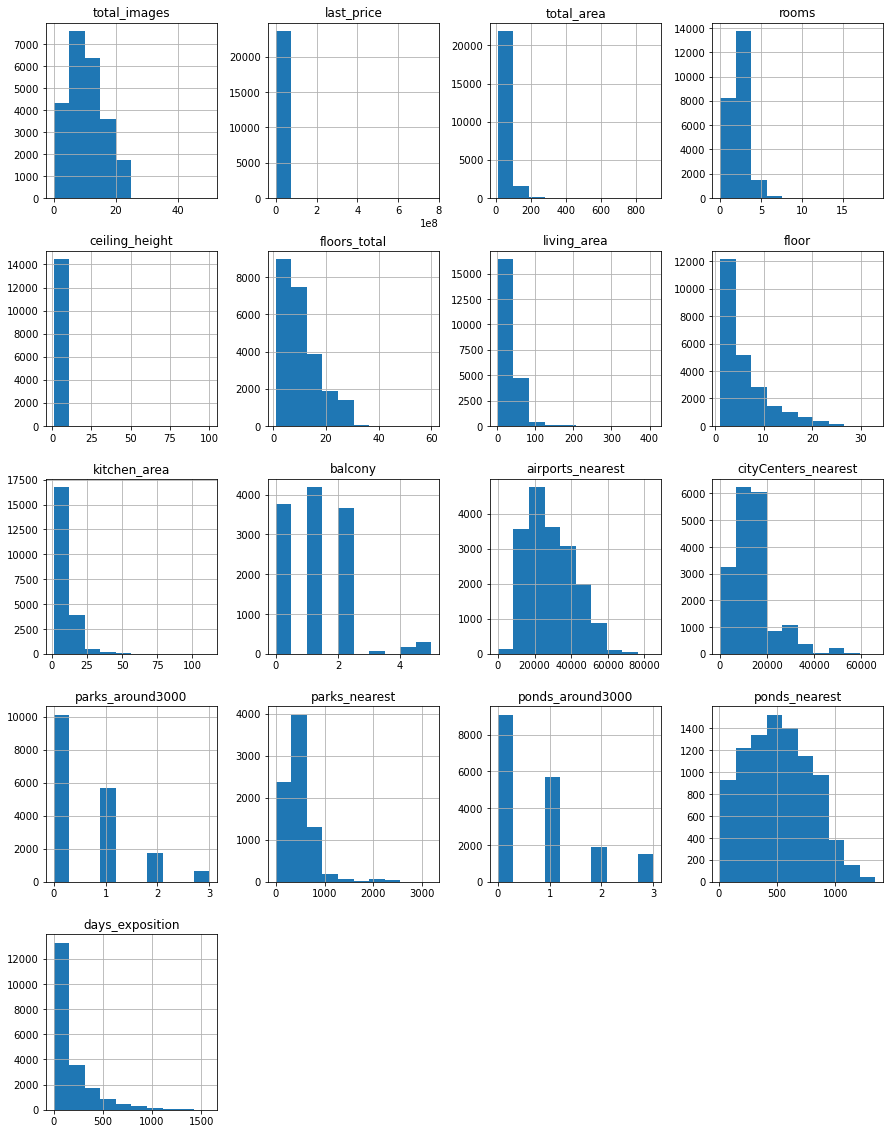

In [5]:
data.hist(figsize=(15, 20))
plt.show();

Как видим из полученных данных во многих столбцах отсутствуют данные. Также как видно из построенных гистограмм в таблице есть данные, чьи значения могут быть выбросами. Необходимо произвести предобработку данных.

### Предобработка данных

In [6]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

In [7]:
# Проверим также наличие пропусков в % для более полного понимания.
pd.DataFrame(round(data.isna().mean()*100,)).style.background_gradient('coolwarm')

,0
total_images,0.000000
last_price,0.000000
total_area,0.000000
first_day_exposition,0.000000
rooms,0.000000
ceiling_height,39.000000
floors_total,0.000000
living_area,8.000000
floor,0.000000
is_apartment,88.000000


Рассмотрим в каких столбцах присутствуют пропуски и попробуем их проаназировать.

In [8]:
# Заполним пропуски в столбце апартаменты, а также изменим тип данных
data['is_apartment'] = data['is_apartment'].fillna(value=False)
data['is_apartment'] = data['is_apartment'].astype('bool')
# Заполним пропуски в столбце балконы, пропущенные значения заменим на 0. А также изменим тип данных.
data['balcony'] = data['balcony'].fillna(value=0).astype(int)
# Приведем к формату дата дату публикования объявления
data['first_day_exposition'] = pd.to_datetime( data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')
# Заменим пропуски данных на 0 и приведем к целочисленному типу.
data['parks_around3000'] = data['parks_around3000'].fillna(value=0).astype(int)
# Приводим в целочисленный тип количество прудов. Заменим пропущенные значения на 0
data['ponds_around3000'] = data['ponds_around3000'].fillna(value=0).astype(int)
#Переименуем столбец расстояние до центра города
data.rename(columns={'cityCenters_nearest' : 'city_centers_nearest'}, inplace=True)

In [9]:
#Удалим строки с пропущенной информацией о названии населенного пункта, т.к. без этой информации мы не можем анализировать продажу недвижимости
data.dropna(subset=['locality_name'], inplace=True)
#Удалим строки с пропущенными значениями об этажности дома.
data.dropna(subset=['floors_total'], inplace=True)

In [10]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9084
floors_total                0
living_area              1865
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area             2222
balcony                     0
locality_name               0
airports_nearest         5524
city_centers_nearest     5501
parks_around3000            0
parks_nearest           15535
ponds_around3000            0
ponds_nearest           14529
days_exposition          3171
dtype: int64

In [11]:
data['ceiling_height'].describe()

count    14481.000000
mean         2.771283
std          1.261983
min          1.000000
25%          2.510000
50%          2.650000
75%          2.800000
max        100.000000
Name: ceiling_height, dtype: float64

In [12]:
#Как мы видим в данных об этажности присутствуют ошибки, т.к. максимум и минимум не соответствует стандартам строительства
#В данных, где потолок выше 14 метров по всей видимости была пропущена точка, исправим эти данные разделив высоту потолка на 10
data.update(data[(data['ceiling_height'] > 14)]['ceiling_height']/10)

76

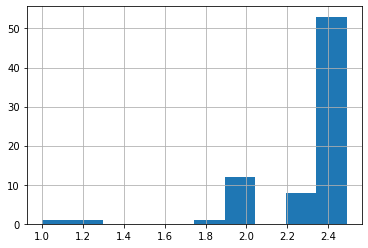

In [13]:
#Рассмотрим подробнее данные о квартирах с потолком менее 2,5 метров. 
data.query('ceiling_height < 2.5')['ceiling_height'].hist()
data.query('ceiling_height < 2.5')['ceiling_height'].count()

Как видно из полученных данных, несмотря на принятые стандарты, согласно которым потолок не должен быть ниже 2.5 метров, квартиры с потолками ниже этой величины имеют место быть. Судя по графику потолок от 2 метров стоит оставить, в то время как потолок менее 2 метров исключить из данных.

In [14]:
data.drop(index=data.query('ceiling_height < 2').index,inplace=True)

Теперь, когда избавились от выбросов, необходимо заполнить пропуски. Их заменим медианными значениями. В Санкт-Петербурги потолки вероятнее выше, чем в селах, поэтому медиану рассчитаем, сгруппировав данные по населенным пунктам. Для этого необходимо сначала привести данные в столбце в порядок. 

In [15]:
data['locality_name'].unique()

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

In [16]:
data['locality_name'].nunique()

364

При таких названиях  нельзя корректно анализировать данные в разрезе населенных пунктов. Необходимо привести названия населенных пунктов к единому формату.

In [17]:
def clean(name):
    splited_name = name.split(' ')
    words_for_remove = {'село', 'поселок', 'посёлок', 'городской', 'деревня', 'типа', \
                        'городского', 'пансионат', 'садовое', 'товарищество', 'коттеджный', \
                        'при', 'железнодорожной', 'станции', 'садоводческое', 'коммерческое'} #set()
    good_words = [word for word in splited_name if word.lower() not in words_for_remove]
    return ' '.join(good_words)
data['locality_name'] = data['locality_name'].apply(clean)

In [18]:
data['locality_name'].unique()

array(['Санкт-Петербург', 'Шушары', 'Янино-1', 'Парголово', 'Мурино',
       'Ломоносов', 'Сертолово', 'Петергоф', 'Пушкин', 'Кудрово',
       'Коммунар', 'Колпино', 'Красный Бор', 'Гатчина', 'Фёдоровское',
       'Выборг', 'Кронштадт', 'Кировск', 'Новое Девяткино',
       'Металлострой', 'Лебяжье', 'Сиверский', 'Молодцово',
       'Кузьмоловский', 'Новая Ропша', 'Павловск', 'Пикколово',
       'Всеволожск', 'Волхов', 'Кингисепп', 'Приозерск', 'Сестрорецк',
       'Куттузи', 'Аннино', 'Ефимовский', 'Плодовое', 'Заклинье',
       'Торковичи', 'Первомайское', 'Красное', 'Понтонный', 'Сясьстрой',
       'Старая', 'Лесколово', 'Новый Свет', 'Сланцы', 'Путилово',
       'Ивангород', 'Шлиссельбург', 'Никольское', 'Зеленогорск',
       'Сосновый Бор', 'Оржицы', 'Кальтино', 'Романовка', 'Бугры',
       'Рощино', 'Кириши', 'Луга', 'Волосово', 'Отрадное', 'Павлово',
       'Оредеж', 'Копорье', 'Молодёжное', 'Тихвин', 'Победа', 'Нурма',
       'Синявино', 'Тосно', 'Стрельна', 'Бокситогорск', 'Але

In [19]:
data['locality_name'].nunique()

305

Теперь, когда устранены неявные дубликаты в наименовании населенных пунктов, заполним пропущенные значения в столбце высота потолков медианами. Медианы расчитаем с учетом группировки по населенным пунктам.

In [20]:
import warnings #импортируем библиотеку

warnings.filterwarnings('ignore') # отключаем предупреждения

In [21]:
data['ceiling_height'] = data.groupby(['locality_name'])['ceiling_height'].apply(lambda x: x.fillna(x.median()))
data['ceiling_height'] = data['ceiling_height'].fillna(data['ceiling_height'].median())
data['ceiling_height'].describe()

count    23562.000000
mean         2.705504
std          0.257228
min          2.000000
25%          2.550000
50%          2.700000
75%          2.700000
max         14.000000
Name: ceiling_height, dtype: float64

In [22]:
data['total_area'].describe()

count    23562.000000
mean        60.324656
std         35.658884
min         12.000000
25%         40.000000
50%         52.000000
75%         69.700000
max        900.000000
Name: total_area, dtype: float64

Диаграмма размаха площади квартиры


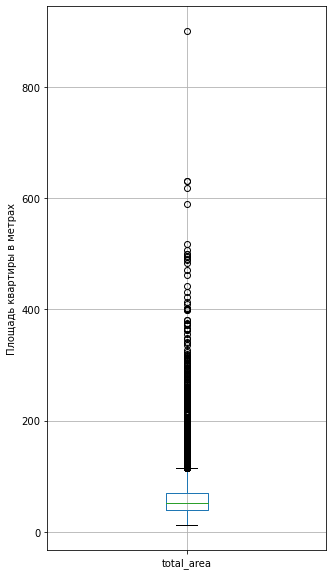

In [23]:
print('Диаграмма размаха площади квартиры')
data.boxplot(column=['total_area'], figsize=(5,10), grid=True)
plt.ylabel('Площадь квартиры в метрах')
plt.show()

In [24]:
data.loc[data['total_area'] > 400, 'total_area'].count()

23

In [25]:
data.loc[data['total_area'] < 15, 'total_area'].count()

6

Уберем из данных аномальные значения на основании диаграммы размаха, а именно квартиры с площадью менее 15 кв.м, т.к. такие квартиры не могут существовать согласно установленным стандартам, а также очень большие квартиры свыше 400 кв. м

In [26]:
data.drop(index=data.query('total_area > 400').index,inplace=True)
data.drop(index=data.query('total_area < 15').index,inplace=True)

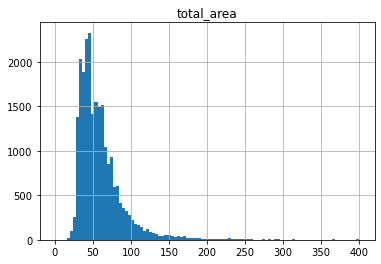

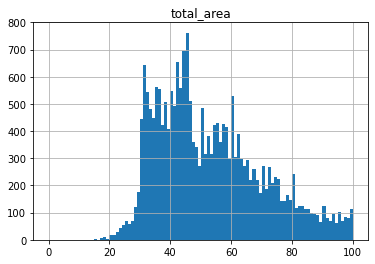

In [27]:
data.hist('total_area', bins=100, range=(0,400))
data.hist('total_area', bins=100, range=(0,100))
plt.show()

Теперь рассмотрим подробнее данные о жилой площади.

count    21677.000000
mean        34.268318
std         20.855988
min          2.000000
25%         18.600000
50%         30.000000
75%         42.260000
max        264.500000
Name: living_area, dtype: float64

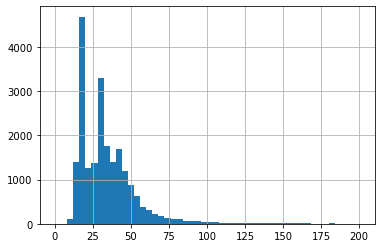

In [28]:
data['living_area'].hist(bins=50, range=(0,200))
data['living_area'].describe()

Согласно действующим СниПам жилая комната не может быть меньше 8 кв.м. 

In [29]:
data.loc[data['living_area'] < 8, 'living_area'].count()

8

Диаграмма размаха жилой площади


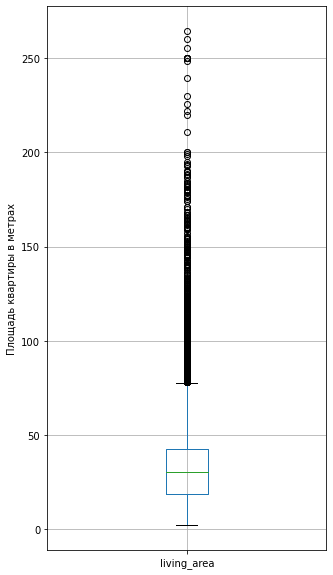

In [30]:
print('Диаграмма размаха жилой площади')
data.boxplot(column=['living_area'], figsize=(5,10), grid=True)
plt.ylabel('Площадь квартиры в метрах')
plt.show()

In [31]:
data.loc[data['living_area'] > 200, 'living_area'].count()

15

Избавимся от явного выброса - квартиры с жилой площадью более 200 кв м

Информация в столбце о жилой площади во многом отсутствует, тогда как общая площадь квартиры заполнена полностью. По всей видимости, люди просто не знали жилую площадь квартиры. Заполним пропуски, рассчитав среднюю долю жилой площади квартир.

In [32]:
data.drop(index=data.query('living_area > 200').index,inplace=True)
data.drop(index=data.query('living_area < 8').index,inplace=True)
living_share = data['living_area'].mean() / data['total_area'].mean()
data['living_area'].fillna(living_share * data['total_area'], inplace=True)

Теперь прозведем те же действия с даными о площади кухни.

In [33]:
data['kitchen_area'].describe()

count    21300.000000
mean        10.513911
std          5.714777
min          1.300000
25%          7.000000
50%          9.100000
75%         12.000000
max        107.000000
Name: kitchen_area, dtype: float64

Диаграмма размаха площади кухни


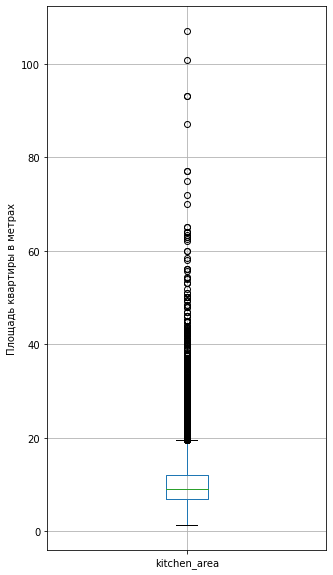

In [34]:
print('Диаграмма размаха площади кухни')
data.boxplot(column=['kitchen_area'], figsize=(5,10), grid=True)
plt.ylabel('Площадь квартиры в метрах')
plt.show()

In [35]:
print('Количество квартир с кухнями площадью менее 3 кв.м:', data.loc[data['kitchen_area'] < 3, 'kitchen_area'].count())
print('Количество квартир с кухнями площадью более 80 кв.м:', data.loc[data['kitchen_area'] > 80, 'kitchen_area'].count())

Количество квартир с кухнями площадью менее 3 кв.м: 10
Количество квартир с кухнями площадью более 80 кв.м: 5


In [36]:
data.drop(index=data.query('kitchen_area > 80').index,inplace=True)
data.drop(index=data.query('kitchen_area < 3').index,inplace=True)
kitchen_share = data['kitchen_area'].mean() / data['total_area'].mean()
data['kitchen_area'].fillna(living_share * data['total_area'], inplace=True)

In [37]:
# Проверим наличие явных дубликатов
data.duplicated().sum()

0

In [38]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23495 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23495 non-null  int64         
 1   last_price            23495 non-null  float64       
 2   total_area            23495 non-null  float64       
 3   first_day_exposition  23495 non-null  datetime64[ns]
 4   rooms                 23495 non-null  int64         
 5   ceiling_height        23495 non-null  float64       
 6   floors_total          23495 non-null  float64       
 7   living_area           23495 non-null  float64       
 8   floor                 23495 non-null  int64         
 9   is_apartment          23495 non-null  bool          
 10  studio                23495 non-null  bool          
 11  open_plan             23495 non-null  bool          
 12  kitchen_area          23495 non-null  float64       
 13  balcony         

**Выводы**

Итак, пропуски остались в столбцах  airports_nearest, city_centers_nearest, parks_nearest, ponds_nearest. Их мы заполнить не можем, т.к. нет смежных данных, позволяющих это сделать, а рзброс в самих данных может быть большим и заполнение пропсуков лишь исказит статистику.
Столбец days_exposition также имеет пропуск, в случае с ним будем считать что объявление еще актуально на момент выгрузки.

Подведем итоги в чем состояла предобработка данных и какие выводы на основании нее мы можем сделать:
* Были удалены пропуски в столбцах locality_name и floors_total. 
* Заменены пропсуки на 0 в стобцах: balcony, parks_around3000, ponds_around3000
* В столбце is_apartment пропуски заменены на False и изменен формат на булев.
* В столбце first_day_exposition измененформат на дату
* В столбце ceiling_height устранены ошибки (неверное написание высоты, пропуск точки), кроме того исключили потолки ниже 2 метров и выше 14 метров. Остальные пропуски заполнены медианными значениями, рассчитами по населенным пунктам.
* В столбце locality_name все названия населенных пунктов приведены к единому формату(оставлено только название) во избежание дублирования информации. На будущем стоит рассмотреть вопрос о закрытом списке населенных пунктов во избежание дублирования и некорректного указания вида населенного пункта
* В столбце  total_area убрали аномальные значения, а именно квартиры с площадью менее 15 кв.м, а также очень большие квартиры свыше 400 кв. м
* В столбцах living_area и kitchen_area были залнены проски на основании средней доли этих площадей в квартирах. Исключили аномальные значения жилой площади менее 8 и более 20 кв.м, а также кухни площадью более 80 кв.м

Многие данные не загружены или отстутвуют, что усложняет анализ данных.

### Посчитайте и добавьте в таблицу новые столбцы

In [39]:
# Добавим столбец цена за метр
data['price_per_meter'] = round(data['last_price'] / data['total_area'],2)
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_meter
0,20,13000000.0,108.0,2019-03-07,3,2.700,16.0,51.000000,8,False,...,0,Санкт-Петербург,18863.0,16028.0,1,482.0,2,755.0,NaN,120370.37
1,7,3350000.0,40.4,2018-12-04,1,2.615,11.0,18.600000,1,False,...,2,Шушары,12817.0,18603.0,0,NaN,0,NaN,81.0,82920.79
2,10,5196000.0,56.0,2015-08-20,2,2.700,5.0,34.300000,4,False,...,0,Санкт-Петербург,21741.0,13933.0,1,90.0,2,574.0,558.0,92785.71
3,0,64900000.0,159.0,2015-07-24,3,2.700,14.0,90.876415,9,False,...,0,Санкт-Петербург,28098.0,6800.0,2,84.0,3,234.0,424.0,408176.10
4,2,10000000.0,100.0,2018-06-19,2,3.030,14.0,32.000000,13,False,...,0,Санкт-Петербург,31856.0,8098.0,2,112.0,1,48.0,121.0,100000.00


In [40]:
# Добавим столбец день недели публикации объявления, месяц и год
data['day_of_publication'] = data['first_day_exposition'].dt.dayofweek
data['month_of_publication'] = data['first_day_exposition'].dt.month
data['year_of_publication'] = data['first_day_exposition'].dt.year
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_meter,day_of_publication,month_of_publication,year_of_publication
0,20,13000000.0,108.0,2019-03-07,3,2.700,16.0,51.000000,8,False,...,16028.0,1,482.0,2,755.0,NaN,120370.37,3,3,2019
1,7,3350000.0,40.4,2018-12-04,1,2.615,11.0,18.600000,1,False,...,18603.0,0,NaN,0,NaN,81.0,82920.79,1,12,2018
2,10,5196000.0,56.0,2015-08-20,2,2.700,5.0,34.300000,4,False,...,13933.0,1,90.0,2,574.0,558.0,92785.71,3,8,2015
3,0,64900000.0,159.0,2015-07-24,3,2.700,14.0,90.876415,9,False,...,6800.0,2,84.0,3,234.0,424.0,408176.10,4,7,2015
4,2,10000000.0,100.0,2018-06-19,2,3.030,14.0,32.000000,13,False,...,8098.0,2,112.0,1,48.0,121.0,100000.00,1,6,2018


In [41]:
# Добавим столбец с типом этажа квартиры (первый, последний, другой)
def floor(row):
    if row['floor'] == 1:
        return 'первый'
    if row['floor'] == row['floors_total']:
        return 'последний'
    else: 
        return 'другой'
data['floor_type'] = data.apply(floor, axis=1)    
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_meter,day_of_publication,month_of_publication,year_of_publication,floor_type
0,20,13000000.0,108.0,2019-03-07,3,2.700,16.0,51.000000,8,False,...,1,482.0,2,755.0,NaN,120370.37,3,3,2019,другой
1,7,3350000.0,40.4,2018-12-04,1,2.615,11.0,18.600000,1,False,...,0,NaN,0,NaN,81.0,82920.79,1,12,2018,первый
2,10,5196000.0,56.0,2015-08-20,2,2.700,5.0,34.300000,4,False,...,1,90.0,2,574.0,558.0,92785.71,3,8,2015,другой
3,0,64900000.0,159.0,2015-07-24,3,2.700,14.0,90.876415,9,False,...,2,84.0,3,234.0,424.0,408176.10,4,7,2015,другой
4,2,10000000.0,100.0,2018-06-19,2,3.030,14.0,32.000000,13,False,...,2,112.0,1,48.0,121.0,100000.00,1,6,2018,другой


In [42]:
# Добавим столбец с расстоянием до центра города в километрах.
data['city_centers_nearest_km'] = round(data['city_centers_nearest'] / 1000)
data['city_centers_nearest_km'] = data['city_centers_nearest_km'].astype('int', errors='ignore')
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_meter,day_of_publication,month_of_publication,year_of_publication,floor_type,city_centers_nearest_km
0,20,13000000.0,108.0,2019-03-07,3,2.700,16.0,51.000000,8,False,...,482.0,2,755.0,NaN,120370.37,3,3,2019,другой,16.0
1,7,3350000.0,40.4,2018-12-04,1,2.615,11.0,18.600000,1,False,...,NaN,0,NaN,81.0,82920.79,1,12,2018,первый,19.0
2,10,5196000.0,56.0,2015-08-20,2,2.700,5.0,34.300000,4,False,...,90.0,2,574.0,558.0,92785.71,3,8,2015,другой,14.0
3,0,64900000.0,159.0,2015-07-24,3,2.700,14.0,90.876415,9,False,...,84.0,3,234.0,424.0,408176.10,4,7,2015,другой,7.0
4,2,10000000.0,100.0,2018-06-19,2,3.030,14.0,32.000000,13,False,...,112.0,1,48.0,121.0,100000.00,1,6,2018,другой,8.0


### Проведите исследовательский анализ данных

#### Анализ параметров объектов:
##### Общая площадь

In [43]:
data['total_area'].describe()

count    23495.000000
mean        59.707192
std         31.788280
min         15.000000
25%         40.000000
50%         52.000000
75%         69.500000
max        400.000000
Name: total_area, dtype: float64

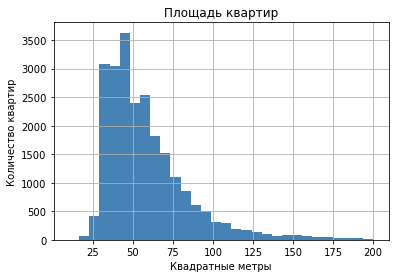

In [44]:
plt.hist(data['total_area'], bins=30, range=(10,200), color = 'steelblue')
plt.title('Площадь квартир')
plt.xlabel('Квадратные метры')
plt.ylabel('Количество квартир')
plt.grid(True)
plt.show()

На диаграмме видно, что основная доля квартир с площадью в пределах от 25 до 100 кв. м. При этом стоит отметить большее число объявлений с площадью 30-50 кв.м

In [45]:
print('Наибольшие по площади варианты:')
print(data['total_area'].sort_values(ascending=False).head(10))

Наибольшие по площади варианты:
5873     400.0
1388     399.0
8822     398.0
7674     380.0
5042     380.0
21990    373.1
19392    371.0
581      365.0
19961    365.0
10684    364.7
Name: total_area, dtype: float64


##### Жилая площадь

In [46]:
data['living_area'].describe()

count    23495.000000
mean        34.235923
std         20.230898
min          8.000000
25%         19.000000
50%         30.000000
75%         42.000000
max        228.619912
Name: living_area, dtype: float64

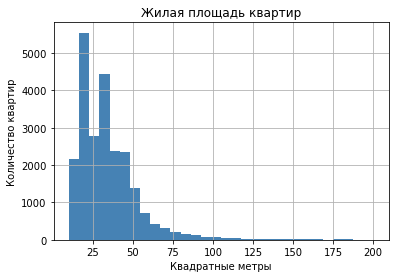

In [47]:
plt.hist(data['living_area'], bins=30, range=(10,200), color = 'steelblue')
plt.title('Жилая площадь квартир')
plt.xlabel('Квадратные метры')
plt.ylabel('Количество квартир')
plt.grid(True)
plt.show()

Большая часть квартир имеет жилую площадь 20-60 кв.м На диаграмме виден всплекс количества квартир с жилой площадью 23-24 кв.м и 30 кв.м

In [48]:
print('Наибольшие по площади варианты:')
print(data['living_area'].sort_values(ascending=False).head(10).round())

Наибольшие по площади варианты:
5873     229.0
1388     228.0
19392    212.0
581      209.0
10684    208.0
6183     208.0
10246    200.0
22907    200.0
13397    199.0
5042     198.0
Name: living_area, dtype: float64


##### Площадь кухни

In [92]:
data['kitchen_area'].describe().round()

count    23495.0
mean        13.0
std         10.0
min          3.0
25%          7.0
50%         10.0
75%         13.0
max        229.0
Name: kitchen_area, dtype: float64

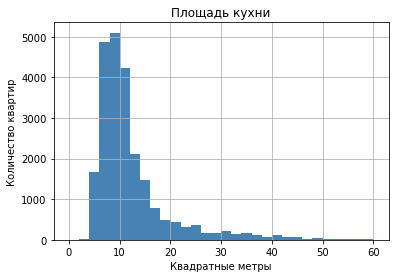

In [50]:
plt.hist(data['kitchen_area'], bins=30, range=(0,60), color = 'steelblue')
plt.title('Площадь кухни')
plt.xlabel('Квадратные метры')
plt.ylabel('Количество квартир')
plt.grid(True)
plt.show()

Основная доля распределения по площади кухонь приходится на квартиры с площадью 5-15 кв.м

In [93]:
print('Наибольшие по площади варианты:')
print(data['kitchen_area'].sort_values(ascending=False).head(10).round())

Наибольшие по площади варианты:
5873     229.0
1388     228.0
7674     217.0
19392    212.0
581      209.0
10684    208.0
155      181.0
11436    181.0
2243     174.0
10181    169.0
Name: kitchen_area, dtype: float64


##### Цена объекта

In [52]:
data['last_price'].describe()

count    2.349500e+04
mean     6.340761e+06
std      7.954894e+06
min      1.219000e+04
25%      3.400000e+06
50%      4.626540e+06
75%      6.750000e+06
max      3.300000e+08
Name: last_price, dtype: float64

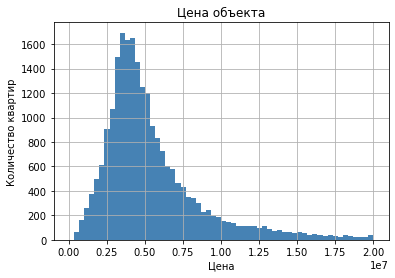

In [53]:
plt.hist(data['last_price'], bins=60, range=(0,20000000), color = 'steelblue')
plt.title('Цена объекта')
plt.xlabel('Цена')
plt.ylabel('Количество квартир')
plt.grid(True)
plt.show()

In [54]:
print('Наибольшие по цене квартиры:')
print(data['last_price'].sort_values(ascending=False).head(10))

Наибольшие по цене квартиры:
1436     330000000.0
22831    289238400.0
16461    245000000.0
8900     190870000.0
19155    160000000.0
2536     159984000.0
16495    159000000.0
1026     155000000.0
22229    148000000.0
12674    140000000.0
Name: last_price, dtype: float64


Как мы видим на диаграмме разброс цен на квартиры существенный. Поэтому если возникнет необходимость детальнее изучать это вопрос стоит разделить квартиры на категории. Однако, при этом основная доля предложений на рынке находится в ценовом диапазоне 2,5 - 7 млн. рублей

##### Количество комнат

In [94]:
data['rooms'].describe().round()

count    23495.0
mean         2.0
std          1.0
min          0.0
25%          1.0
50%          2.0
75%          3.0
max         16.0
Name: rooms, dtype: float64

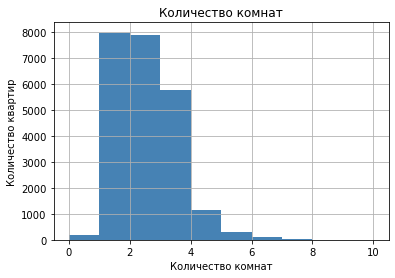

In [56]:
plt.hist(data['rooms'], bins=10, range=(0,10), color = 'steelblue')
plt.title('Количество комнат')
plt.xlabel('Количество комнат')
plt.ylabel('Количество квартир')
plt.grid(True)
plt.show()

In [57]:
print('Наибольшие по количеству комнат квартиры:')
print(data['rooms'].sort_values(ascending=False).head(10))

Наибольшие по количеству комнат квартиры:
18848    16
20829    14
9688     11
648      11
18119    10
4149     10
18891    10
20791     9
8822      9
13397     9
Name: rooms, dtype: int64


В основном продают квартиры 1-3 комнатные, чуть меньше 4 комнатные. Большие варианты редкость, но присутствуют на рынке.

##### Высота потолков

In [95]:
data['ceiling_height'].describe().round()

count    23495.0
mean         3.0
std          0.0
min          2.0
25%          3.0
50%          3.0
75%          3.0
max         14.0
Name: ceiling_height, dtype: float64

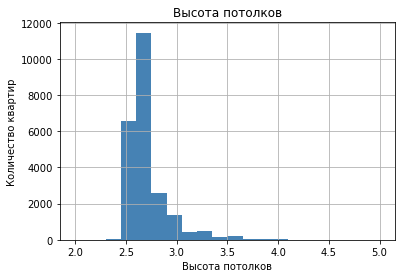

In [59]:
plt.hist(data['ceiling_height'], bins=20, range=(2,5), color = 'steelblue')
plt.title('Высота потолков')
plt.xlabel('Высота потолков')
plt.ylabel('Количество квартир')
plt.grid(True)
plt.show()

Основная часть объявлений квартир с высотой потолков 2.5-2.8 м

In [60]:
print('Наибольшие по высоте потолков квартиры:')
print(data['ceiling_height'].sort_values(ascending=False).head(10))

Наибольшие по высоте потолков квартиры:
15061    14.0
22309    10.3
22869    10.0
5863      8.3
3474      8.0
15743     8.0
17442     8.0
20264     6.0
21227     5.8
1388      5.6
Name: ceiling_height, dtype: float64


##### Этаж квартиры

In [96]:
data['floor'].describe().round()

count    23495.0
mean         6.0
std          5.0
min          1.0
25%          2.0
50%          4.0
75%          8.0
max         33.0
Name: floor, dtype: float64

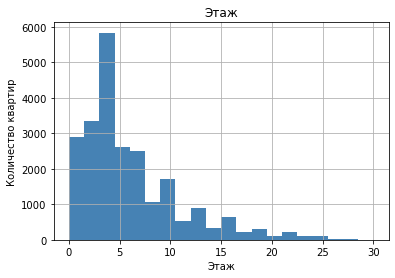

In [62]:
plt.hist(data['floor'], bins=20, range=(0,30), color = 'steelblue')
plt.title('Этаж')
plt.xlabel('Этаж')
plt.ylabel('Количество квартир')
plt.grid(True)
plt.show()

Основная доля объявлений приходится на квартиры 1-8 этаж. В особенности на фоне других выделяется доля квартир, находящихся на 4 этаже.

In [63]:
print('Квартиры на самых высоких этажах:')
print(data['floor'].sort_values(ascending=False).head(10))

Квартиры на самых высоких этажах:
18218    33
11575    32
18629    31
1917     30
11079    29
397      28
16644    27
4091     27
6157     27
13276    27
Name: floor, dtype: int64


##### Тип этажа квартиры («первый», «последний», «другой»)

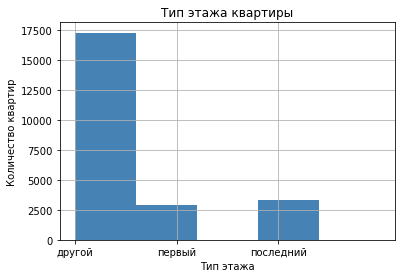

In [64]:
plt.hist(data['floor_type'], bins=5, range=(0,3), color = 'steelblue')
plt.title('Тип этажа квартиры')
plt.xlabel('Тип этажа')
plt.ylabel('Количество квартир')
plt.grid(True)
plt.show()

Большая часть квартир относится к типу "другой"

#####  Общее количество этажей в доме

In [65]:
data['floors_total'].describe()

count    23495.000000
mean        10.680230
std          6.593218
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         60.000000
Name: floors_total, dtype: float64

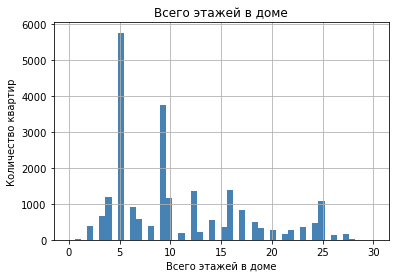

In [66]:
plt.hist(data['floors_total'], bins=50, range=(0,30), color = 'steelblue')
plt.title('Всего этажей в доме')
plt.xlabel('Всего этажей в доме')
plt.ylabel('Количество квартир')
plt.grid(True)
plt.show()

Большую часть квартир продается в 5-ти этажных и 9-ти этажных домах. Иная этажность домов встречается реже.

##### Расстояние до центра города в метрах

In [67]:
data['city_centers_nearest'].describe()

count    17998.000000
mean     14215.866096
std       8612.659106
min        181.000000
25%       9278.000000
50%      13114.000000
75%      16293.000000
max      65968.000000
Name: city_centers_nearest, dtype: float64

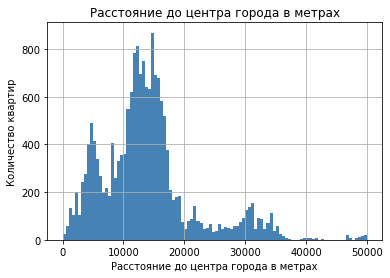

In [68]:
plt.hist(data['city_centers_nearest'], bins=100, range=(0,50000), color = 'steelblue')
plt.title('Расстояние до центра города в метрах')
plt.xlabel('Расстояние до центра города в метрах')
plt.ylabel('Количество квартир')
plt.grid(True)
plt.show()

Распределение квартир в зависимости от расстояния до центра города неравномерно. Большая часть квартир находится на расстоянии от 9 000 до 18 000 метров от центра. Однако наблюдается также весомая часть квартир на расстоянии примерно 3000-7000 метров. В связи с тем, что само понятие "центр города" не точное, возможно такие волны распределения из-за разного взгляда на то, что считать центром города и как рассчитывать расстояние до него.

##### Расстояние до ближайшего аэропорта

In [97]:
data['airports_nearest'].describe().round()

count    17977.0
mean     28807.0
std      12646.0
min          0.0
25%      18551.0
50%      26766.0
75%      37294.0
max      84869.0
Name: airports_nearest, dtype: float64

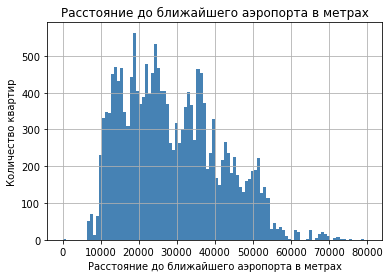

In [70]:
plt.hist(data['airports_nearest'], bins=100, range=(0,80000), color = 'steelblue')
plt.title('Расстояние до ближайшего аэропорта в метрах')
plt.xlabel('Расстояние до ближайшего аэропорта в метрах')
plt.ylabel('Количество квартир')
plt.grid(True)
plt.show()

Наибольшее количество квартир находится на расстоянии от 10 000 до 40 000 метров до аэропорта. Распределение квартир нельзя однозначно назвать нормальным, больше оно напоминает распределение Пуассона. Стоит отметить, что расстояние до аэропорта показатель, который во многом зависит от населенного пункта, т.к. в некоторых населенных пунктах аэропорта нет.

##### Расстояние до ближайшего парка

In [98]:
data['parks_nearest'].describe().round()

count    7990.0
mean      491.0
std       341.0
min         1.0
25%       288.0
50%       455.0
75%       612.0
max      3190.0
Name: parks_nearest, dtype: float64

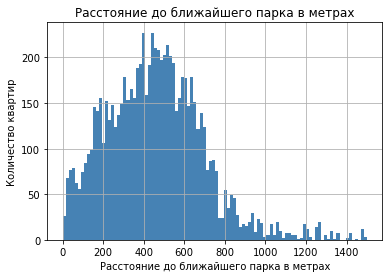

In [72]:
plt.hist(data['parks_nearest'], bins=100, range=(0,1500), color = 'steelblue')
plt.title('Расстояние до ближайшего парка в метрах')
plt.xlabel('Расстояние до ближайшего парка в метрах')
plt.ylabel('Количество квартир')
plt.grid(True)
plt.show()

В основном квартиры находятся на расстоянии от 150 до 700 метров от парка.

##### День и месяц публикации объявления.

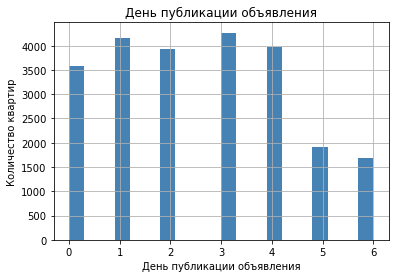

In [73]:
plt.hist(data['day_of_publication'], bins=20, range=(0,6), color = 'steelblue')
plt.title('День публикации объявления')
plt.xlabel('День публикации объявления')
plt.ylabel('Количество квартир')
plt.grid(True)
plt.show()

Преимущественно объявления публикуются в будние дни. Из них в понедельник чуть меньше.

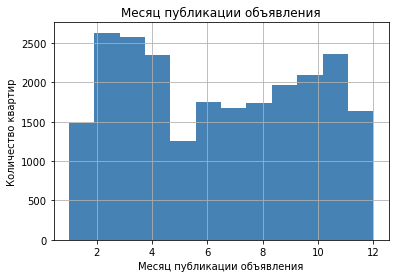

In [74]:
plt.hist(data['month_of_publication'], bins=12, range=(1,12), color = 'steelblue')
plt.title('Месяц публикации объявления')
plt.xlabel('Месяц публикации объявления')
plt.ylabel('Количество квартир')
plt.grid(True)
plt.show()

Пик публикации объявлений приходится на февраль-апрель, осенние месяцы также довольно активны. Спады наблюдаются в "праздничные" месяцы май, декабрь и январь. В летние месяцы также есть небольшое снижение активности. Это объясняется тем, что деловая активность в целом в эти месяцы падает.

#### Как быстро продавались квартиры

In [75]:
data['days_exposition'].agg(['mean','median'])

mean      180.738356
median     95.000000
Name: days_exposition, dtype: float64

In [99]:
data['days_exposition'].describe().round()

count    20333.0
mean       181.0
std        220.0
min          1.0
25%         45.0
50%         95.0
75%        231.0
max       1580.0
Name: days_exposition, dtype: float64

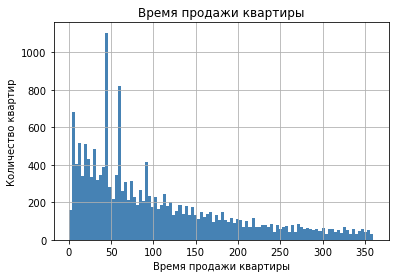

In [77]:
plt.hist(data['days_exposition'], bins=100, range=(0,360), color = 'steelblue')
plt.title('Время продажи квартиры')
plt.xlabel('Время продажи квартиры')
plt.ylabel('Количество квартир')
plt.grid(True)
plt.show()

В основном квартиры продавались в течение 2-3 месяцев. Быстрой продажей можно назвать продажу в срок до 45 дней, длинной продажей являются продажи свыше 231 дня.

#### Анализ факторов, влияющих на общую (полную) стоимость объекта
#####  Зависимость цены от общей площади

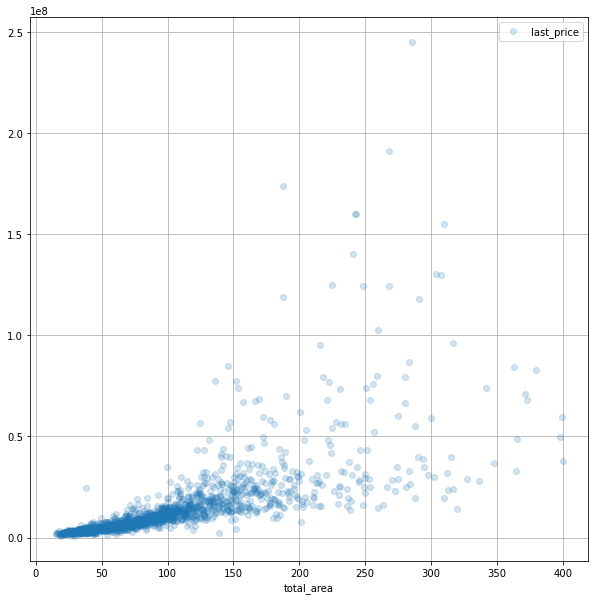

Корреляция цены и площади: 

            last_price  total_area
last_price    1.000000    0.876082
total_area    0.876082    1.000000 



In [78]:
(data.pivot_table(index='total_area', values='last_price').plot(grid=True, style='o', figsize=(10, 10), alpha=0.2))
plt.show()
print('Корреляция цены и площади:','\n')
print(data.pivot_table(index='floor', values=['total_area', 'last_price']).corr(),'\n')


#####  Зависимость цены от жилой площади

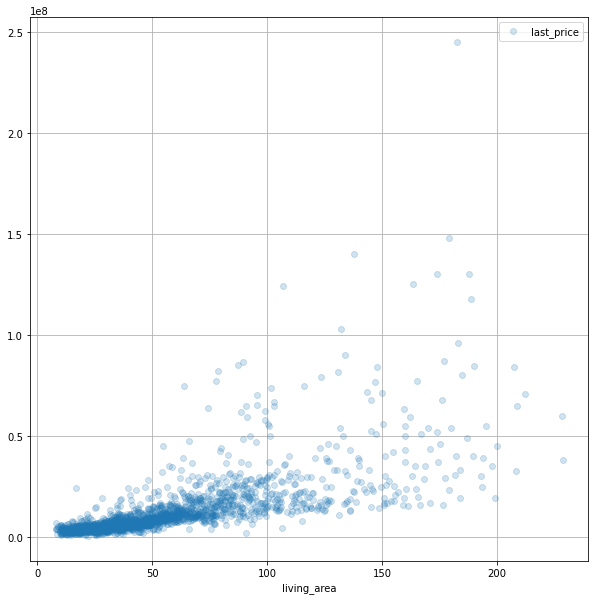

Корреляция цены и жилой площади: 

             last_price  living_area
last_price     1.000000     0.766081
living_area    0.766081     1.000000 



In [79]:
(data.pivot_table(index='living_area', values='last_price').plot(grid=True, style='o', figsize=(10, 10), alpha=0.2))
plt.show()
print('Корреляция цены и жилой площади:','\n')
print(data.pivot_table(index='floor', values=['living_area', 'last_price']).corr(),'\n')


#####  Зависимость цены от площади кухни

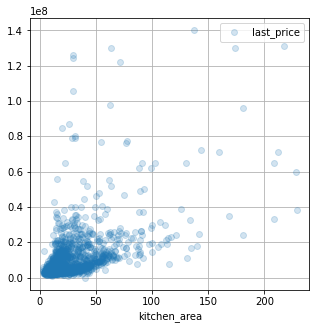

Корреляция цены и площади кухни: 

              kitchen_area  last_price
kitchen_area      1.000000    0.161362
last_price        0.161362    1.000000 



In [80]:
(data.pivot_table(index='kitchen_area', values='last_price').plot(grid=True, style='o', figsize=(5, 5), alpha=0.2))
plt.show()
print('Корреляция цены и площади кухни:','\n')
print(data.pivot_table(index='floor', values=['kitchen_area', 'last_price']).corr(),'\n')

#####  Зависимость цены от количества комнат

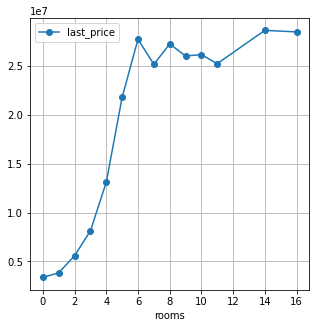

Корреляция цены и количества комнат: 

            last_price     rooms
last_price    1.000000  0.629156
rooms         0.629156  1.000000 



In [81]:
(data.pivot_table(index='rooms', values='last_price').plot(grid=True, style='o-', figsize=(5, 5)))
plt.show()
print('Корреляция цены и количества комнат:','\n')
print(data.pivot_table(index='floor', values=['rooms', 'last_price']).corr(),'\n')

#####  Зависимость цены от типа этажа

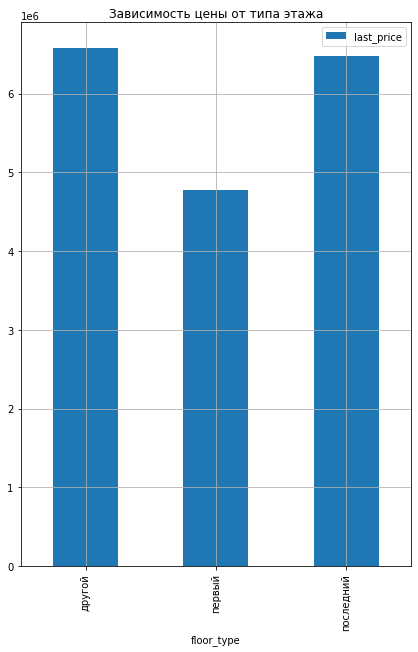

In [82]:
(data.pivot_table(index='floor_type', values='last_price').plot(grid=True, figsize=(7, 10), kind='bar', title='Зависимость цены от типа этажа'))
plt.show()

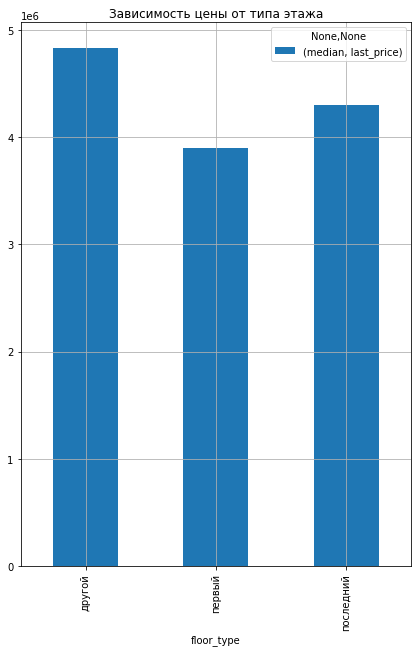

In [83]:
# Попробуем сгруппировать по медиане для более точной оценки
(data.pivot_table(index='floor_type', values='last_price', aggfunc=['median']).plot(grid=True, figsize=(7, 10), kind='bar', title='Зависимость цены от типа этажа'))
plt.show()

#####  Зависимость цены от даты размещения

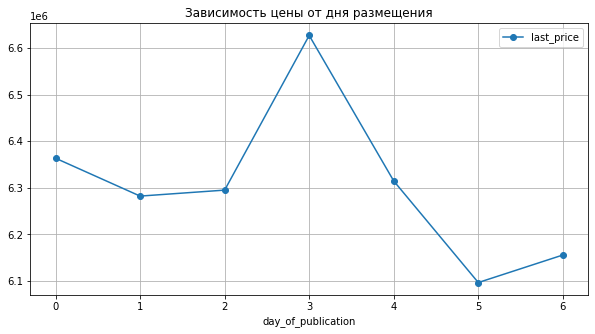

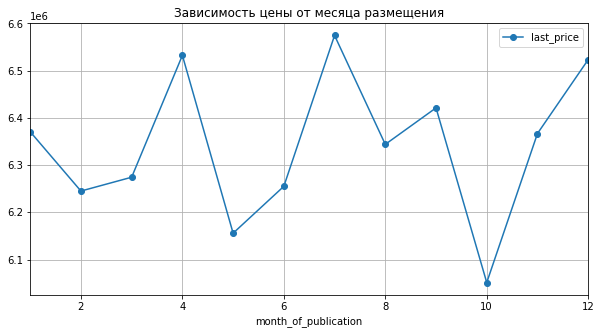

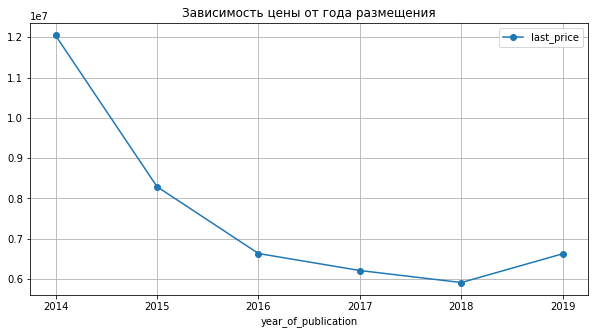

In [84]:
# Зависимость от дня размещения
data.pivot_table(index='day_of_publication', values='last_price').plot(grid=True, style='o-', figsize=(10, 5), title='Зависимость цены от дня размещения')
plt.show()
# Зависимость от месяца размещения
data.pivot_table(index='month_of_publication', values='last_price').plot(grid=True, style='o-', xlim=(1,12), figsize=(10, 5), title='Зависимость цены от месяца размещения')
plt.show()
# Зависимость от года размещения
data.pivot_table(index='year_of_publication', values='last_price').plot(grid=True, style='o-', figsize=(10, 5), title='Зависимость цены от года размещения')
plt.show()

Сравним динамику изменения цен и площадей продаваемых объектов. Для исключения влияния аномальных значений возьмем для сравнения медиану.

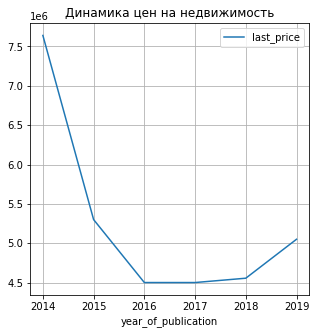

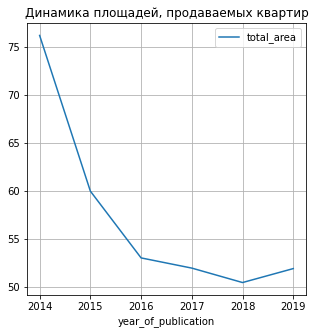

In [85]:
data.pivot_table(index='year_of_publication', values='last_price', aggfunc='median').plot(grid=True, style='-', figsize=(5, 5), title='Динамика цен на недвижимость')
data.pivot_table(index='year_of_publication', values='total_area', aggfunc='median').plot(grid=True, style='-', figsize=(5, 5), title='Динамика площадей, продаваемых квартир')
plt.show()

Как мы видим из графиков, несмотря на общий тренд, цены на квартиры снизились больше, чем площадь, продаваемых объектов. Для более четкой картины рассмотрим также динамику изменения стоимости квадратного метра недвижимости.

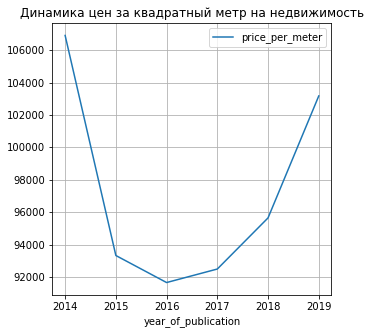

In [86]:
data.pivot_table(index='year_of_publication', values='price_per_meter', aggfunc='median').plot(grid=True, style='-', figsize=(5, 5), title='Динамика цен за квадратный метр на недвижимость')
plt.show()

Здесь наблюдается уже совсем другая динамика. Начиная с 2016 года цена за квадратный метр неизменно растет и в 2019 года почти достигла уровня 2014 года.

##### Выводы

В соответствии с проведенным анализом можно утверждать, что наибольшее влияние на цену квартиры оказывает ее общая площадь и жилая площадь в частности (Коэффициент корреляции 0.876 и 0.766 соотвественно). Влияние площади кухни на цену квартиры довольно низкое ( 0.16). От количества комнат цена объекта также имеет большую зависимость (коэффициент корреляции 0.629). При этом стоит отметить, что такая зависимость снижается, если идет речь об объектах с количеством комнат больше 7. Вероятно потому что такие объекты в целом являются редкими и относятся к элитной недвижимости, имеющей несколько иное ценообразование. Говоря о типе этажа меньшую стоимость будуь иметь квартиры на 1 этаже. Цена на иных этажах самая высокая, чуть меньше (если сравнивать по медиане) цена на последнем этаже. Цены за последний этаж на достаточно высоком уровне, возможно за счет более дорогой недвижимости, где у последнего этажа есть свои преимущества в виде мансарды, выхода на крышу и пр. 

Что касается зависимости цены недвижимости от даты публикации:
* Объявления, которые были опубликованы в субботу и четверг имеют цену объектов существенно выше остальных дней. В воскресенье самая низка цена
* Самый "дорогостоящий" сентябрь, это можно связать с началом деловой активности после сезонного спада летом. Также на высоком уровне цены недвижимости в апреле, что тоже можно объяснить повышением деловой активности после месяцев с множеством праздников.  В мае и июне размещаются объявления с самой низкой ценой.
* В 2014 году наблюдался скачок в цене объектов недвижимости после чего происходило снижение. Вероятно это было связано с геополитическими и экономическими причинами 2014 года. Резко снизился курс рубля, спрос на недвижимость, являясь надежным средством защиты накоплений, повысился в результате чего цена предложения также повысилась.

Также отдельно стоит отметить изменение цены за квадратный метр в рассматриваемом периоде. Начиная с 2016 года наблюдается значительный и уверенный рост данного показателя, связанный, по всей видимости, с тенденциями рынка в целом на фоне общей экономической ситуацией в стране.


#### Cредняя цена одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений.

In [87]:
top_10 = data.value_counts('locality_name')
top_10 = data.pivot_table(index='locality_name', values='price_per_meter', aggfunc=['count', 'mean', 'median'])
top_10 = top_10.sort_values(('count', 'price_per_meter'), ascending=False).astype(int)
top_10 = top_10[:10]


In [88]:
top_10

,count,mean,median
,price_per_meter,price_per_meter,price_per_meter
locality_name,,,
Санкт-Петербург,15586,114354,104727
Мурино,584,86017,86250
Кудрово,470,95260,95555
Шушары,439,78551,76829
Всеволожск,398,68654,65789
Пушкин,367,103056,99987
Колпино,338,75424,74723
Парголово,327,90175,91642


Минимальная средняя цена среди 10 городов, с наибольшим числом обявлений о продаже недвижимости в г. Выборг (58 141  руб. за квадратный метр). Вероятно это связано с тем, что он находится далеко от Санкт-Петербурга и имеет небольшую численность. Максимальная цена недвижимости, как и ожидалось, в г. Санкт-Петербурге 114 629 руб. за квадратный метр. Следом за ним Пушкин, Кудрово и Парголово, вероятно из-за близости к Санкт-Петербургу.

#### Анализ зависимости стоимости объектов  от расстояния до центра города в г. Санкт-Петербург

In [89]:
spb = data.query('locality_name == "Санкт-Петербург"')

In [90]:
spb_stat = spb.pivot_table(index='city_centers_nearest_km', values='last_price')
spb_stat.head(10)


,last_price
city_centers_nearest_km,
0.0,3.047237e+07
1.0,2.096032e+07
2.0,1.643857e+07
3.0,1.075958e+07
4.0,1.192825e+07
5.0,1.308522e+07
6.0,1.410752e+07
7.0,1.444358e+07
8.0,9.231034e+06


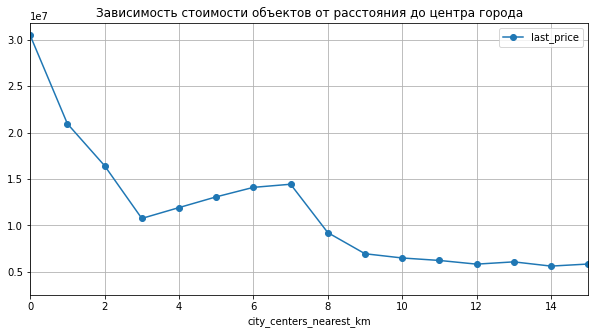

In [91]:
spb_stat.plot(grid=True, style='o-', xlim=(0,15), figsize=(10, 5), title = 'Зависимость стоимости объектов от расстояния до центра города');

При анализе зависимости стоимости объектов от расстояния до центра города наблюдается высокая цена жилья на расстоянии до 2 км от центра города, что вполне предсказуемо. Небольшой подъем цен наблюдатся на расстоянии 6-7 км от центра. Возможно потому что это расстояние от центра находится в удобной доступности и с развитой инфраструктурой, но при этом более спокойные районы, подходящие для семей. 

### Общий вывод

В ходе работы был проведен анализ данных сервиса Яндекс Недвижимость — архив объявлений за несколько лет о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за 2014-2019 гг.
В рамках проведения анализа были выполнены следующие работы:
* определены пропущенные значения
* заполнены пропущенные значения там, где это возможно
* даны пояснения, какие пропущенные значения обнаружены
* изменены типы данных
* устранены неявные дубликаты в названиях населённых пунктов
* устранены редкие и выбивающиеся значения (аномалии) во всех столбцах
* посчитаны и добавлены в таблицу необходимые для анализа показатели
* изучены и описаны основные параметры объектов, а также построены гистограммы для них
* проанализированы сроки продажи квартир
* рассмотрены факторы, влияющие на стоимость объекта
* рассчитана средняя цена одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений
* выявлена зависимость стоимости объектор от расстояния до центра города в г. Санкт_Петербург

На основании проделанной работы можно сделать следующие выводы:
    Предварительный анализ данных показал наличие большого количества пропусков. При этом основная их часть относилась к картографическим данным (расстояния до ближайшего парка, водоема, аэропорта, водоема и центра города). В дальнейшем следует обратить на это внимание. Кроме того, столбец название населенного пункта требует дороботки, т.к. в нем содержатся разные варианты упоминания вида населенного пункта, в результате чего очень многие населенные пункты дублируются. Если бы пользователю предоставлялся закрый список населенных пунктов, то этой проблемы можно было бы избежать.
    Дальнейший анализ параметров объектов показал, что:
* основная доля квартир с площадью в пределах от 25 до 100 кв. м. При этом стоит отметить большее число объявлений с площадью 30-50 кв.м
* Большая часть квартир имеет жилую площадь 20-60 кв.м, при этом стоит отметить пики  количества продаваемых квартир с жилой площадью 23-24 кв.м и 30 кв.м
* Основная доля распределения по площади кухонь приходится на квартиры с площадью 5-15 кв.м
* Основная доля предложений на рынке находится в ценовом диапазоне 2,5 - 7 млн. рублей Однако, разброс цен на квартиры существенный. Поэтому если возникнет необходимость в дальнейшем детальнее изучать это вопрос стоит разделить квартиры на категории в зависимости от цен.
* В основном продают квартиры 1-3 комнатные, чуть меньше 4 комнатные. Варианты с большим количеством комнат редкость, но  также присутствуют на рынке.
* Основная часть объявлений квартир с высотой потолков 2.5-2.8 м
* Основная доля объявлений приходится на квартиры 1-8 этаж. В особенности на фоне других выделяется доля квартир, находящихся на 4 этаже.
* Большая часть объектов относится к типу "другой", т.е. не первый и не последний этаж здания.
* Большую часть квартир продается в 5-ти этажных и 9-ти этажных домах. Иная этажность домов встречается реже.
* Распределение квартир в зависимости от расстояния до центра города неравномерно. Большая часть квартир находится на расстоянии от 9 000 до 18 000 метров от центра. Однако наблюдается также весомая часть квартир на расстоянии примерно 3000-7000 метров.
* Наибольшее количество квартир находится на расстоянии от 10 000 до 40 000 метров до аэропорта. 
* В основном квартиры находятся на расстоянии от 150 до 700 метров от парка.
* Преимущественно объявления публикуются в будние дни. Из них в понедельник чуть меньше.
* Пик публикации объявлений приходится на февраль-апрель, осенние месяцы также довольно активны. Спады наблюдаются в "праздничные" месяцы май, декабрь и январь. В летние месяцы также есть небольшое снижение активности.
    В основном квартиры продавались в течение 2-3 месяцев. Быстрой продажей можно назвать продажу в срок до 45 дней, длинной продажей являются продажи свыше 231 дня.
    В соответствии с проведенным анализом можно утверждать, что наибольшее влияние на цену квартиры оказывает:
* общая площадь - коэффициент корреляции 0.876
* жилая площадь - коэффициент корреляции 0.766
* количество комнат - коэффициент корреляции 0.629
   Также немаловажным фактором ценообразования является этаж, на котором находится квартира. Меньшая цена у квартир, находящихся на первом этаже
  Что касается зависимости цены недвижимости от даты публикации:
    Объявления, которые были опубликованы в субботу и четверг имеют цену объектов существенно выше остальных дней. В воскресенье самая низкая цена.
    Сентябрь и апрель это месяцы в которые публикуются объекты с самой высокой ценой, вероятно из-за факторов сезонности. Самая же низка цена у квартир, у которых стпрт продаж приходится на май и июнь, месяца которы свойственен спад деловой активности.
    В 2014 году наблюдался скачок в цене объектов недвижтмости после чего происходило снижение. Вероятно это было связано с геополитическими и экономическими причинами 2014 года. Резко снизился курс рубля, спрос на недвижимость, являясь надежным средством защиты накоплений, повысился в результате чего цена предложения также повысилась.
    Минимальная средняя цена за квадратный метр среди 10 городов, с наибольшим числом обявлений о продаже недвижимости в г. Выборг (58 141 руб. за квадратный метр). Максимальная цена недвижимости, как и ожидалось, в г. Санкт-Петербурге 114 629 руб. за квадратный метр. Следом за ним Пушкин, Кудрово и Парголово.
    При анализе зависимости стоимости объектов г. Санкт-Петербурга от расстояния до центра города наблюдается высокая цена жилья на расстоянии до 2 км от центра города. Небольшой подъем цен наблюдатся на расстоянии 6-7 км от центра. 
    


    